# Introduction To Data Science – Assignment 2

---

#### Sections A – B – C – D

---

##***Instructions: Read These Carefully Before Starting!***

1. Due Date: Thursday 20th October 2022 – 11:59PM

2. **Name the file in the format Lyyxxxx_A2.ipynb and save it as .ipynb (e.g. L216666_A2.ipynb)**

3. Submission will be taken on Google Classroom (**submit SINGLE .ipynb file ONLY**)

4. **Assignment will not be evaluated if**:

> * You submit python (.py) files
> * You submit multiple .ipynb files
> * You submit compressed (.rar or .zip) files

5. **Work in the spaces provided and do not delete/modify any cells from this template.**

6. Upload data files directly to Google Colab - do not use Google Drive or GitHub linking method

*Not following these instructions will lead to mark deduction.*

---

All source files needed to complete this assignment can be found on the following [Google Drive link](https://drive.google.com/drive/folders/1qBib_6ZOhvHb73ZRLWiCMWl9NFyU1IDO?usp=sharing). Download these files and upload them to your Google Colab Notebook. 

**Do not link Google Drive or GitHub with Colab.**

**Do not add these files with your submission on Google Classroom.**

---

Happy Coding 🌺

---

TA Emails

Section A, C - Muhammad Maarij l192347@lhr.nu.edu.pk

Section B, D - Hira Ijaz l192377@lhr.nu.edu.pk

---

---
## Question 0

Add all library imports here

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

---
## Question 1

####Single Linear Regression with Gradient Descent

> Take help from slides 26 and 30
---

**Part A -**
Write a function that calculates and returns value for hypothesis $h_\theta(x)$

In [2]:
# complete this function implementation
def hypothesis(x, theta):
    return theta[0] + theta[1]*x

**Part B -**
Write a function that calculates and returns value for loss/cost $J(\theta_0, \theta_1)$

In [4]:
# complete this function implementation
def loss(x, y):
    m = len(y)
    sum = 0
    for i in range(m):
        sum += (x[i] - y[i])**2
        k=sum / (2*m)
    return k

**Part C-**
Write a function that applies the gradient descent algorithm and updates values of $\theta_0$ and $\theta_1$ until they converge.

* take default vaue of $α$ to be 0.015
* take default number of iterations to be 15000
* print loss after every 500 iterations

In [5]:
# complete this function implementation
def gradientDescent(x, y, theta, numIterations= 15000, alpha= 0.015):
    n = 500
    t0 = 0
    t1 = 0
    m = len(x)
    cost = []
    for i in range(m):
        t0 += hypothesis(x[i], theta) - y[i]
        t1 += (hypothesis(x[i], theta) - y[i])*x[i]
    for j in range(numIterations):
        theta[0] -= alpha*(1/m)*t0
        theta[1] -= alpha*(1/m)*t1
    for k in range(m):
        if (k % n == 0):
            cost.append(loss(hypothesis(x[k], theta), y[k]))
            print(cost)
    return theta, cost

**Part D -**
FactoryRevenue.csv contains information about the number of workers in a factory and the annual profit for that factory. Import the file FactoryRevenue.csv as a Pandas DataSet and print out the information for it.

In [6]:
import pandas as pd
df = pd.read_csv("FactoryRevenue.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TotalFactoryWorkers  98 non-null     float64
 1   AnnualProfit         98 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


**Part E -**
Remove rows that have any null values

In [7]:
print("Number of Rows Before: ",df.shape[0])
print("Number of rows containing null data:",df.isnull().sum().sum())
df.dropna(inplace=True)
print("Number of rows containing null data after removal:",df.isnull().sum().sum())
print("Number of Rows After: ",df.shape[0])

Number of Rows Before:  99
Number of rows containing null data: 2
Number of rows containing null data after removal: 0
Number of Rows After:  97


**Part F -**

First identify the independant and dependant variables. 

Then create two arrays named x and y and add independant variable data to array x, dependant variable data to array y.

In [8]:
# independant variable:
#factory workers  
x=[]
#dependent variables:
#Annual profit
y=[]
x = np.array(df[["TotalFactoryWorkers"]])
y = np.array(df[["AnnualProfit"]])
#x,y = df["TotalFactoryWorkers"].values.reshape(1,-1) ,df["AnnualProfit"].values.reshape(1,-1)
print("THE INDEPENDENT VARIABLES DATA\n")
print(x)

print("THE DEPENDENT VARIABLES DATA\n")
print(y)

result=np.add(x,y)
print("\nADDED ARRAY")
print(result)


THE INDEPENDENT VARIABLES DATA

[[ 65894.]
 [ 92482.]
 [ 58918.]
 [ 82111.]
 [ 79334.]
 [ 80959.]
 [ 56063.]
 [128360.]
 [ 63534.]
 [ 63328.]
 [ 63589.]
 [ 62742.]
 [ 56397.]
 [ 93102.]
 [ 94536.]
 [ 88254.]
 [ 51793.]
 [212790.]
 [149080.]
 [189590.]
 [ 72182.]
 [ 82951.]
 [102360.]
 [ 54994.]
 [203410.]
 [101360.]
 [ 61101.]
 [ 55277.]
 [ 85186.]
 [ 70032.]
 [ 58598.]
 [ 83829.]
 [ 74764.]
 [ 85781.]
 [ 64862.]
 [ 50546.]
 [ 57107.]
 [141640.]
 [ 57340.]
 [ 84084.]
 [ 56407.]
 [ 53794.]
 [ 63654.]
 [ 51301.]
 [ 64296.]
 [ 70708.]
 [ 61891.]
 [202700.]
 [ 54901.]
 [ 63261.]
 [ 55649.]
 [189450.]
 [128280.]
 [109570.]
 [131760.]
 [222030.]
 [ 52524.]
 [ 91802.]
 [ 60020.]
 [ 55204.]
 [ 50594.]
 [ 57077.]
 [ 76366.]
 [ 58707.]
 [ 53054.]
 [ 82934.]
 [133940.]
 [ 54369.]
 [ 73345.]
 [ 60062.]
 [ 72259.]
 [ 50269.]
 [ 65479.]
 [ 75386.]
 [ 50365.]
 [102740.]
 [ 51077.]
 [ 57292.]
 [ 51884.]
 [ 63557.]
 [ 97687.]
 [ 65159.]
 [ 85172.]
 [ 54069.]
 [ 68825.]
 [117080.]
 [ 57737.]
 [ 78247.]


**Part G -** 

Create an array called 'theta' that will hold $θ_0$ and $θ_1$. Initalize both values to 0.

Then call the gradientDescent function using array x, array y, and array theta. Do not provide any other input parameters.

Print out the values of y-intercept and slope/gradient

In [9]:
theta=[0,0]
gradientDescent(x,y,theta)
print("Slope/Gradient:", theta[0])
print("Intercept:", theta[1])

[4.6906908086063036e+33]
Slope/Gradient: [13138053.86597511]
Intercept: [1.46989912e+12]


**Part H -** Plot a scatter plot and regression line on the same graph

[13138053.86597511]


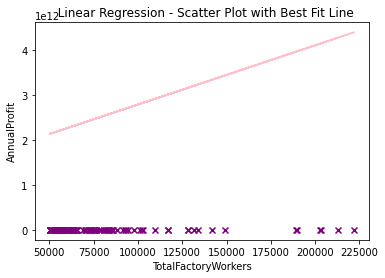

In [10]:
slope=theta[0]
intercept=theta[1]
print(slope)
yp=slope*x+intercept
plt.scatter(x, y, color="purple",marker = "x")
plt.plot(x, yp, color="pink")
plt.xlabel("TotalFactoryWorkers")
plt.ylabel("AnnualProfit")
plt.title("  Linear Regression - Scatter Plot with Best Fit Line")
plt.show()

---
## Question 2

Logistic Regression on Flowers Dataset

---



**Part A** - Load the file FlowersData.csv and describe the dataset

In [11]:
import pandas as pd
df = pd.read_csv("FlowersData.csv")
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Part B** - Split data into training and test data using SKLearn train_test_split. Specify parameter test_size to be 25%

Hint: You will be needing 4 arrays: X_train, X_test, y_train, y_test

In [12]:
x = df.replace({'flower_name':{'hibiscus':1,'daffodil':2,'lily':3}})
#y=df[['sepal_length','sepal_width','petal_length','petal_width']].values
#y = y.reshape(-1, 1)
inputs = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X= df[inputs]
y=df.flower_name

X_train=[]
X_test=[]
y_train=[]
y_test=[]
 
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25)  #25%

#print(y_train)
#print(X_train)

**Part C** - Perform scaling on the X_test and X_train values using StandardScacler from SKLearn Library

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_st = ss.fit_transform(X_train)
X_test_st = ss.transform(X_test)
print(X_train_st)

[[ 0.20880576 -0.14810074  0.57469796  0.75661927]
 [ 1.52129914 -0.14810074  1.08734888  0.48929638]
 [ 0.08948818 -0.37225322  0.3468531   0.35563493]
 [-1.10368761  0.52435668 -1.41894452 -1.38196391]
 [-0.74573487  1.42096659 -1.36198331 -1.38196391]
 [ 0.44744092 -0.82055817  0.57469796  0.75661927]
 [-0.98437003  0.74850916 -1.36198331 -1.38196391]
 [-0.50709971  0.97266163 -1.47590573 -1.38196391]
 [-1.81959309  0.30020421 -1.47590573 -1.38196391]
 [ 2.11788704 -1.04471064  1.71392223  1.42492652]
 [ 0.20880576 -0.14810074  0.40381432  0.22197348]
 [ 1.40198156 -0.14810074  1.1443101   1.15760362]
 [ 0.5667585   0.30020421  0.3468531   0.35563493]
 [ 0.92471124  0.52435668  1.03038767  1.69224942]
 [-1.10368761  0.30020421 -1.53286695 -1.38196391]
 [-0.14914697 -1.04471064  0.06204704 -0.04534942]
 [ 0.5667585  -0.59640569  0.97342646  1.29126507]
 [-1.34232277  0.74850916 -1.13413845 -1.38196391]
 [-0.14914697 -0.82055817  0.68862039  0.89028072]
 [-1.10368761  1.19681411 -1.41

**Part D** - Train Model using SKLearn LogisticRegression

In [24]:
classifier =  LogisticRegression(solver = 'liblinear') 
classifier.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

**Part E** - Predict Labels for test split

In [25]:
y_pred = classifier.predict(X_test)
print(y_pred)

['lily' 'lily' 'hibiscus' 'hibiscus' 'daffodil' 'daffodil' 'hibiscus'
 'hibiscus' 'lily' 'lily' 'hibiscus' 'daffodil' 'daffodil' 'lily'
 'hibiscus' 'hibiscus' 'hibiscus' 'daffodil' 'hibiscus' 'hibiscus'
 'hibiscus' 'lily' 'hibiscus' 'lily' 'hibiscus' 'lily' 'daffodil'
 'daffodil' 'lily' 'hibiscus' 'hibiscus' 'daffodil' 'daffodil' 'lily'
 'lily' 'hibiscus' 'daffodil' 'lily']


---
## Question 3

Confusion Matrix Construction

---

**Part A** - Using the prediction result of logistic regression (Question 2) construct a confusion matrix using SKLearn confusion_matrix

Print out this confusion matrix

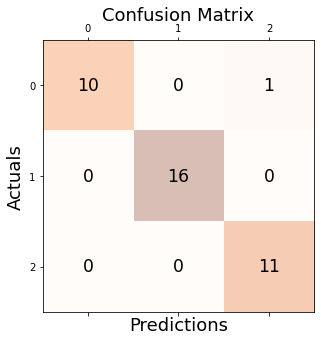

In [29]:
#from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Part B** - Calculate and print Accuracy

In [30]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:",acc)

Accuracy: 0.9736842105263158


**Part C** - Calculate and print Recall

In [31]:
rec = recall_score(y_test, y_pred, average = 'micro')
print("Recall:",rec)

Recall: 0.9736842105263158


**Part D** - Calculate and print Precision

In [32]:
pre = precision_score(y_test, y_pred, average = 'micro')
print("Precision:",pre)

Precision: 0.9736842105263158


**Part E** - Calculate and print $𝐹_1$ Score

In [33]:
f1=2*(pre*rec)/(pre+rec)
print("F1 Score:",f1)

F1 Score: 0.9736842105263158
